## Machine Learning Algorithms applied to Divorce Data

In [30]:
# Import dependencies

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os



In [31]:
# read data from csv file into pandas data frame
df = pd.read_csv("slimTurkeySurveyDataWithCategories.csv")
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,4,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


## K Nearest Neighbors

In [32]:
data = df.values
X = data[:, 0:54]
y = data[:, 54]

In [33]:
X[1]

array([4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 3, 4, 0, 4, 4, 4, 4, 3, 2, 1, 1,
       0, 2, 2, 1, 2, 0, 1, 1, 0, 4, 2, 3, 0, 2, 3, 4, 2, 4, 2, 2, 3, 4,
       2, 2, 2, 3, 4, 4, 4, 4, 2, 2], dtype=int64)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [35]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

In [36]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.957
k: 3, Train/Test Score: 0.964/0.979
k: 5, Train/Test Score: 0.964/0.979
k: 7, Train/Test Score: 0.964/0.979
k: 9, Train/Test Score: 0.964/0.979
k: 11, Train/Test Score: 0.964/0.979
k: 13, Train/Test Score: 0.957/0.979
k: 15, Train/Test Score: 0.957/0.979
k: 17, Train/Test Score: 0.914/0.872
k: 19, Train/Test Score: 0.914/0.872


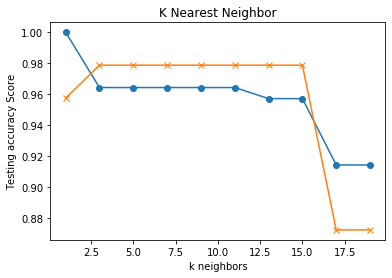

In [37]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.title('K Nearest Neighbor')
# plt.legend(handles=["k neighbors", "Testing accuracy Score"], loc="best")
plt.show()

In [38]:
# k: 3 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

k=3 Test Acc: 0.979


In [39]:
new_divorce_data = [[3, 4, 1, 1, 3, 1, 0, 4, 4, 3, 4, 4, 2, 3, 3, 4, 1, 2, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 2, 0, 0, 0, 1, 1, 3, 2, 0, 3, 1, 0,
       1, 0, 0, 3, 1, 1, 1, 3, 1, 3]]
predicted_class = knn.predict(new_divorce_data)
print(predicted_class)

[0]


In [40]:
another_divorce_data = [[4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 3, 4, 0, 4, 4, 4, 4, 3, 2, 1, 1,
       0, 2, 2, 1, 2, 0, 1, 1, 0, 4, 2, 3, 0, 2, 3, 4, 2, 4, 2, 2, 3, 4,
       2, 2, 2, 3, 4, 4, 4, 4, 2, 2]]
predicted_class = knn.predict(another_divorce_data)
print(predicted_class)

[1]


In [41]:
target = df["Class"]
target_names = ["Married", "Divorced"]

In [42]:
from sklearn.metrics import classification_report
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

     Married       0.96      1.00      0.98        25
    Divorced       1.00      0.95      0.98        22

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



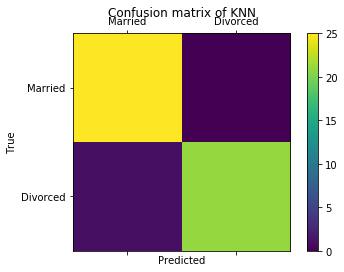

In [43]:
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
# print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of KNN')
fig.colorbar(cax)
ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [44]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  25
False Positives:  0
False Negatives:  1
True Positives:  21


In [19]:
# fig.savefig('KNN.png')